In [483]:
# Turn on scikit-learn optimizations
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [484]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt

# import hvplot.pandas
# from pathlib import Path
# import plotly.express as px

In [485]:
# Load the diabetes_binary_health_indicators_BRFSS2015.csv dataset.
url = 'https://diabetesdb.s3.amazonaws.com/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes_df = pd.read_csv(url)
diabetes_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [486]:
#  Check dataframe shape
print(diabetes_df.shape)

(253680, 22)


In [487]:
# Drop the null columns where all values are null
cleaned_df = diabetes_df.dropna(axis='columns', how='all')

# Drop the null rows
cleaned_df.dropna(inplace=True)

# Remove dupplicates
cleaned_df.drop_duplicates(inplace=True)

print(cleaned_df.shape)

(229474, 22)


### Determine the feature and target sets

In [488]:
# Create our targets
y = pd.DataFrame(cleaned_df['Diabetes_binary'])
print(y.shape)

# Create our features
X = cleaned_df.copy().drop(columns = 'Diabetes_binary')
X.head(20)

(229474, 1)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [489]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,0.794587,0.060791,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,0.404004,0.238947,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [490]:
# Check the balance of our target values
y['Diabetes_binary'].value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

### Connect to the AWS RDS instance and write DataFrames to table in RDS.

In [491]:
from sqlalchemy import create_engine
from getpass import getpass 
password = getpass()

host='finalprojectpostgresdb.c8qy85pnur1r.us-east-1.rds.amazonaws.com'
port=int(5432)
username='finalprojectg4'
passw=password
database='finalprojectg4'

········


In [492]:
# Create a sqlalchemy engine
engine = create_engine('postgresql+psycopg2://' + username + ':' + passw + '@' + host + ':'+ str(port) + '/' + database , echo=False)

In [493]:
# Create dataframe for patient_info and patient_result
patient_info = X.copy()
patient_result = y.copy()
patient_data = cleaned_df.copy()

In [494]:
# Write patient_info to table in RDS
patient_info.to_sql('patient_info', engine, if_exists='replace',index=False)

474

In [495]:
# Write patient_result to table in RDS
patient_result.to_sql('patient_result', engine, if_exists='replace',index=False)

474

In [496]:
# Write patient_data to table in RDS
patient_data.to_sql('patient_data', engine, if_exists='replace',index=False)

474

### Split the Data into Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)

### Standardize the data

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM

In [48]:
from sklearn.svm import SVC

# Create a SVM classifier
svm_clf = SVC(kernel='linear')

# Train svm_clf using the training sets
svm_clf.fit(X_train_scaled, y_train.values.ravel())

SVC(kernel='linear')

In [49]:
# Predict the response for test dataset
y_pred = svm_clf.predict(X_test_scaled)

In [50]:
# Compare the predicted results to the actual results
results = pd.DataFrame({"Prediction": y_pred,"Actual": y_test.values.ravel()}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


In [51]:
# Calculated the balanced accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [52]:
# Display the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,48595,0
Actual 1,8774,0


In [502]:
# Displaying results
print ("SVM Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

SVM Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,48595,0
Actual 1,8774,0


Accuracy Score : 0.8470602590249089
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81     48595
         1.0       0.32      0.77      0.46      8774

    accuracy                           0.72     57369
   macro avg       0.63      0.74      0.63     57369
weighted avg       0.85      0.72      0.76     57369



### Decision Trees Model

In [17]:
from sklearn import tree

In [504]:
# Creating the decision tree classifier instance.
dt_clf = tree.DecisionTreeClassifier()

# Fitting the model.
dt_clf = dt_clf.fit(X_train_scaled, y_train)

In [505]:
# Making predictions using the testing data.
y_pred = dt_clf.predict(X_test_scaled)
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [506]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,41523,7072
Actual 1,5863,2911


In [507]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)

In [508]:
# Displaying results
print("Decision Trees Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Decision Trees Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,41523,7072
Actual 1,5863,2911


Accuracy Score : 0.7745297983231362
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     48595
         1.0       0.29      0.33      0.31      8774

    accuracy                           0.77     57369
   macro avg       0.58      0.59      0.59     57369
weighted avg       0.79      0.77      0.78     57369



In [509]:
# List the features sorted in descending order by feature importance
importances = dt_clf.feature_importances_
importance_list = pd.DataFrame({"Column":X.columns,"Value":importances}).sort_values(by=['Value'],ascending = False)

for index, row in importance_list.iterrows():
    print(f'{row["Column"]}: ({row["Value"]})')

BMI: (0.13705153932193032)
Income: (0.10971714476739201)
Age: (0.09988031135634336)
PhysHlth: (0.09120615943289305)
Education: (0.07757499027022575)
MentHlth: (0.06928271224629359)
HighBP: (0.0662025460535878)
GenHlth: (0.06231212759654337)
Smoker: (0.03829235963149839)
Fruits: (0.03765548336183787)
PhysActivity: (0.03435206432568912)
Sex: (0.031079389113766072)
Veggies: (0.029626015407587088)
DiffWalk: (0.02485838893109119)
HeartDiseaseorAttack: (0.018141755941764787)
NoDocbcCost: (0.017827225891933928)
HighChol: (0.017738623837810167)
Stroke: (0.015566937910028816)
AnyHealthcare: (0.009608194668243813)
HvyAlcoholConsump: (0.00800892777397466)
CholCheck: (0.00401710215956489)


## Oversampling

### RandomOverSampler (Oversample)

In [510]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

sampler = RandomOverSampler(random_state = 1)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'Diabetes_binary': 1})

In [511]:
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model using the resampled data
ros_lr_model = LogisticRegression(solver = 'lbfgs', random_state = 1, max_iter = 10000)
ros_lr_model.fit(X_resampled, y_resampled.values.ravel())

LogisticRegression(max_iter=10000, random_state=1)

In [516]:
# Calculated the balanced accuracy score
y_pred = ros_lr_model.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.7372674642055388

In [513]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,34702,13893
Actual 1,2102,6672


In [514]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.71      0.76      0.81      0.74      0.54     48595
        1.0       0.32      0.76      0.71      0.45      0.74      0.55      8774

avg / total       0.85      0.72      0.75      0.76      0.74      0.54     57369



In [515]:
# Displaying results
print("RandomOverSampler Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Imbalanced Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

RandomOverSampler Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34702,13893
Actual 1,2102,6672


Accuracy Score : 0.7372674642055388
Imbalanced Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.71      0.76      0.81      0.74      0.54     48595
        1.0       0.32      0.76      0.71      0.45      0.74      0.55      8774

avg / total       0.85      0.72      0.75      0.76      0.74      0.54     57369



### SMOTE (Oversample)

In [517]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE(random_state = 1, sampling_strategy = 'auto').fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'Diabetes_binary': 1})

In [518]:
# Train the Logistic Regression model using the resampled data
smote_lr_model = LogisticRegression(solver = 'lbfgs', random_state = 1, max_iter = 10000)
smote_lr_model.fit(X_resampled, y_resampled.values.ravel())

LogisticRegression(max_iter=10000, random_state=1)

In [519]:
# Calculated the balanced accuracy score
y_pred = smote_lr_model.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.7332989838721552

In [521]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,34704,13891
Actual 1,2172,6602


In [522]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.71      0.75      0.81      0.73      0.54     48595
        1.0       0.32      0.75      0.71      0.45      0.73      0.54      8774

avg / total       0.85      0.72      0.75      0.76      0.73      0.54     57369



In [524]:
# Displaying results
print("SMOTE Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Imbalanced Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

SMOTE Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34704,13891
Actual 1,2172,6602


Accuracy Score : 0.7332989838721552
Imbalanced Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.71      0.75      0.81      0.73      0.54     48595
        1.0       0.32      0.75      0.71      0.45      0.73      0.54      8774

avg / total       0.85      0.72      0.75      0.76      0.73      0.54     57369



## Undersampling

### ClusterCentroids (Undersample)

In [525]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state = 1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'Diabetes_binary': 1})

In [526]:
# Train the Logistic Regression model using the resampled data
cc_lr_model = LogisticRegression(solver = 'lbfgs', random_state = 1, max_iter = 10000)
cc_lr_model.fit(X_resampled, y_resampled.values.ravel())

LogisticRegression(max_iter=10000, random_state=1)

In [527]:
# Calculated the balanced accuracy score
y_pred = cc_lr_model.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.7092809801794688

In [528]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,32558,16037
Actual 1,2206,6568


In [529]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.67      0.75      0.78      0.71      0.50     48595
        1.0       0.29      0.75      0.67      0.42      0.71      0.51      8774

avg / total       0.84      0.68      0.74      0.73      0.71      0.50     57369



In [530]:
# Displaying results
print("ClusterCentroids Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Imbalanced Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

ClusterCentroids Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,32558,16037
Actual 1,2206,6568


Accuracy Score : 0.7092809801794688
Imbalanced Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.67      0.75      0.78      0.71      0.50     48595
        1.0       0.29      0.75      0.67      0.42      0.71      0.51      8774

avg / total       0.84      0.68      0.74      0.73      0.71      0.50     57369



## Combination (Over and Under) Sampling

### SMOTEENN

In [560]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state = 1)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)
Counter(y_resampled)

Counter({'Diabetes_binary': 1})

In [561]:
# Train the Logistic Regression model using the resampled data
smoteenn_lr_model = LogisticRegression(solver = 'lbfgs', random_state = 1, max_iter = 10000)
smoteenn_lr_model.fit(X_resampled, y_resampled.values.ravel())

LogisticRegression(max_iter=10000, random_state=1)

In [562]:
# Calculated the balanced accuracy score
y_pred = smoteenn_lr_model.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.7268373433907667

In [563]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[27751, 20844],
       [ 1030,  7744]], dtype=int64)

In [564]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,27751,20844
Actual 1,1030,7744


In [565]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.96      0.57      0.88      0.72      0.71      0.49     48595
        1.0       0.27      0.88      0.57      0.41      0.71      0.52      8774

avg / total       0.86      0.62      0.83      0.67      0.71      0.49     57369



In [566]:
# Displaying results
print("SMOTEENN Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Imbalanced Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

SMOTEENN Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,27751,20844
Actual 1,1030,7744


Accuracy Score : 0.7268373433907667
Imbalanced Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.96      0.57      0.88      0.72      0.71      0.49     48595
        1.0       0.27      0.88      0.57      0.41      0.71      0.52      8774

avg / total       0.86      0.62      0.83      0.67      0.71      0.49     57369



## Ensemble Learners

### BalancedRandomForestClassifier

In [548]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1).fit(X_train_scaled,y_train.values.ravel())
brf_model

BalancedRandomForestClassifier(random_state=1)

In [549]:
# Calculated the balanced accuracy score
y_pred = brf_model.predict(X_test_scaled)
acc_score = balanced_accuracy_score(y_test,y_pred)

In [550]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[33188, 15407],
       [ 1956,  6818]], dtype=int64)

In [551]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,33188,15407
Actual 1,1956,6818


In [552]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.68      0.78      0.79      0.73      0.53     48595
        1.0       0.31      0.78      0.68      0.44      0.73      0.54      8774

avg / total       0.85      0.70      0.76      0.74      0.73      0.53     57369



In [553]:
# Displaying results
print("BalancedRandomForestClassifier Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Imbalanced Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

BalancedRandomForestClassifier Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,33188,15407
Actual 1,1956,6818


Accuracy Score : 0.7300097663421234
Imbalanced Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.94      0.68      0.78      0.79      0.73      0.53     48595
        1.0       0.31      0.78      0.68      0.44      0.73      0.54      8774

avg / total       0.85      0.70      0.76      0.74      0.73      0.53     57369



In [66]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_
importance_list = pd.DataFrame({"Column":X.columns,"Value":importances}).sort_values(by=['Value'],ascending = False)

for index, row in importance_list.iterrows():
    print(f'{row["Column"]}: ({row["Value"]})')

BMI: (0.16947397298666836)
Age: (0.13095806530427379)
GenHlth: (0.09680729983208586)
Income: (0.0874086220640658)
PhysHlth: (0.07214125941211927)
HighBP: (0.06892113484967274)
Education: (0.060809370841636484)
MentHlth: (0.05374915459479329)
HighChol: (0.03611463234200675)
Smoker: (0.029958394812398835)
Fruits: (0.029564550941952608)
Sex: (0.026486027699019782)
PhysActivity: (0.025023547362055254)
DiffWalk: (0.02365396178137393)
Veggies: (0.023648438016202592)
HeartDiseaseorAttack: (0.01726695412901121)
NoDocbcCost: (0.012980479346195901)
Stroke: (0.010619582072540441)
HvyAlcoholConsump: (0.009954627831171146)
AnyHealthcare: (0.007913268552755212)
CholCheck: (0.006546655228000683)


### EasyEnsembleClassifier

In [554]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
ee_model = EasyEnsembleClassifier(n_estimators=100, random_state=1).fit(X_train_scaled,y_train.values.ravel())
ee_model

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [555]:
# Calculated the balanced accuracy score
y_pred = ee_model.predict(X_test_scaled)
acc_score  = balanced_accuracy_score(y_test,y_pred)
acc_score

0.7407365420563092

In [556]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[34513, 14082],
       [ 2007,  6767]], dtype=int64)

In [557]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,34513,14082
Actual 1,2007,6767


In [558]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      0.71      0.77      0.81      0.74      0.54     48595
        1.0       0.32      0.77      0.71      0.46      0.74      0.55      8774

avg / total       0.85      0.72      0.76      0.76      0.74      0.55     57369



In [559]:
# Displaying results
print("EasyEnsembleClassfiler Model:")
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Imbalanced Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

EasyEnsembleClassfiler Model:
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34513,14082
Actual 1,2007,6767


Accuracy Score : 0.7407365420563092
Imbalanced Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      0.71      0.77      0.81      0.74      0.54     48595
        1.0       0.32      0.77      0.71      0.46      0.74      0.55      8774

avg / total       0.85      0.72      0.76      0.76      0.74      0.55     57369



## Deep Learning Model

In [241]:
# # Determine the number of unique values in each column.
dlm_df = cleaned_df.copy()
dlm_df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [242]:
# Check data types
dlm_df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [243]:
print(dlm_df.shape)

(229474, 22)


In [244]:
# Look at BMI value counts for binning
BMI_counts = dlm_df.BMI.value_counts()
BMI_counts.head(10)

27.0    21514
26.0    17775
24.0    16497
28.0    14914
25.0    14793
29.0    13727
30.0    13484
23.0    13296
31.0    11627
22.0    11521
Name: BMI, dtype: int64

<AxesSubplot: ylabel='Density'>

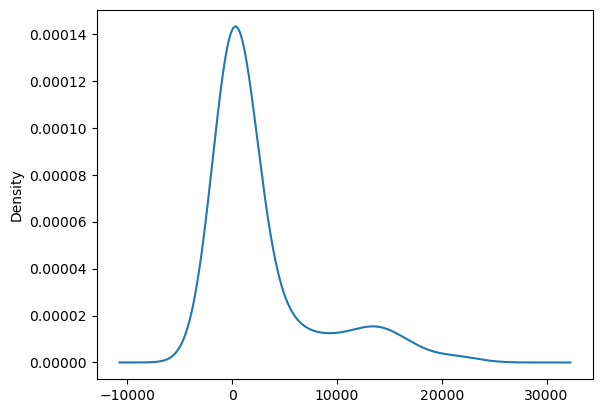

In [245]:
# Visualize the value counts of BMI
BMI_counts.plot.density()

In [246]:
# Determine which values to replace if counts are less than ...?
replace_BMI = list(BMI_counts[BMI_counts<13200].index)
replace_BMI

# Replace in dataframe
for bmi in replace_BMI:
    dlm_df.BMI = dlm_df.BMI.replace(bmi,"100.0")
    
# Check to make sure binning was successful
dlm_df.BMI.value_counts()

100.0    103474
27.0      21514
26.0      17775
24.0      16497
28.0      14914
25.0      14793
29.0      13727
30.0      13484
23.0      13296
Name: BMI, dtype: int64

In [247]:
# Look at MentHlth value counts for binning
MentHlth_counts = dlm_df.MentHlth.value_counts()
MentHlth_counts.head(10)

0.0     152325
2.0      12692
30.0     12079
5.0       8913
1.0       8307
3.0       7301
10.0      6352
15.0      5501
4.0       3774
20.0      3362
Name: MentHlth, dtype: int64

<AxesSubplot: ylabel='Density'>

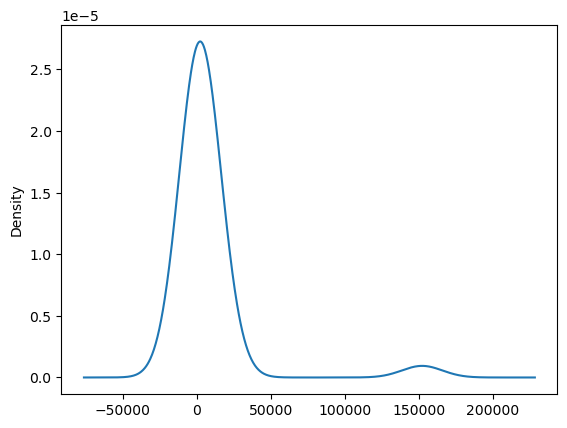

In [248]:
# Visualize the value counts of MentHlth
MentHlth_counts.plot.density()

In [249]:
# Determine which values to replace if counts are less than ...?
replace_MentHlth = list(MentHlth_counts[MentHlth_counts<5000].index)
replace_MentHlth

# Replace in dataframe
for m in replace_MentHlth:
    dlm_df.MentHlth = dlm_df.MentHlth.replace(m,"100.0")
    
# Check to make sure binning was successful
dlm_df.MentHlth.value_counts()

0.0      152325
100.0     16004
2.0       12692
30.0      12079
5.0        8913
1.0        8307
3.0        7301
10.0       6352
15.0       5501
Name: MentHlth, dtype: int64

In [250]:
# Look at PhytHlth value counts for binning
PhysHlth_counts = dlm_df.PhysHlth.value_counts()
PhysHlth_counts.head(10)

0.0     136578
30.0     19385
2.0      14491
1.0      11073
3.0       8435
5.0       7595
10.0      5588
15.0      4914
7.0       4531
4.0       4521
Name: PhysHlth, dtype: int64

<AxesSubplot: ylabel='Density'>

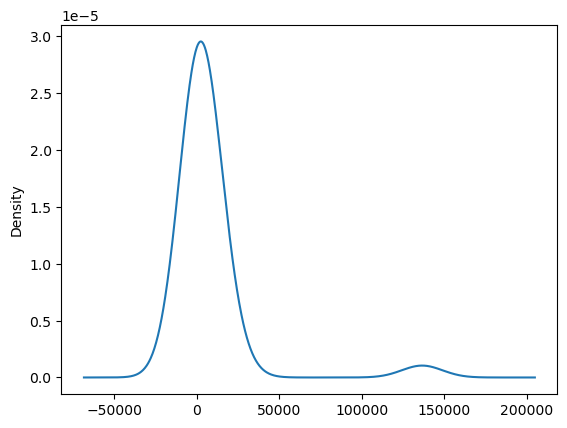

In [251]:
# Visualize the value counts of PhysHlth
PhysHlth_counts.plot.density()

In [252]:
# Determine which values to replace if counts are less than ...?
replace_PhysHlth = list(PhysHlth_counts[PhysHlth_counts<4900].index)
replace_PhysHlth

# Replace in dataframe
for m in replace_PhysHlth:
    dlm_df.PhysHlth = dlm_df.PhysHlth.replace(m,"100.0")
    
# Check to make sure binning was successful
dlm_df.PhysHlth.value_counts()

0.0      136578
100.0     21415
30.0      19385
2.0       14491
1.0       11073
3.0        8435
5.0        7595
10.0       5588
15.0       4914
Name: PhysHlth, dtype: int64

In [253]:
# Look at Age value counts for binning
Age_counts = dlm_df.Age.value_counts()
Age_counts.head(10)

9.0     29678
10.0    29093
8.0     27272
7.0     23121
11.0    21993
6.0     17280
13.0    16791
12.0    15379
5.0     14040
4.0     12229
Name: Age, dtype: int64

<AxesSubplot: ylabel='Density'>

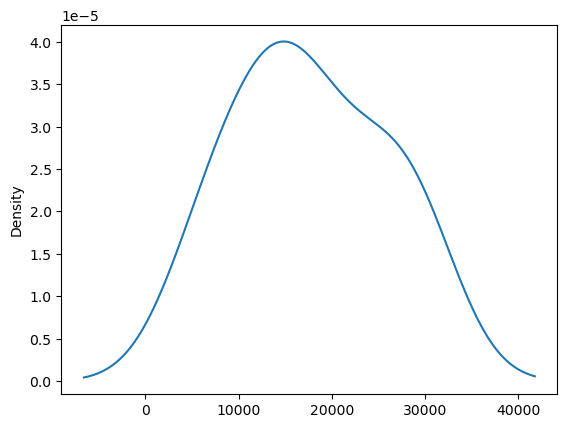

In [254]:
# Visualize the value counts of Age
Age_counts.plot.density()

In [255]:
# Determine which values to replace if counts are less than ...?
replace_Age = list(Age_counts[Age_counts<15000].index)
replace_Age

# Replace in dataframe
for m in replace_Age:
    dlm_df.Age = dlm_df.Age.replace(m,"100.0")
    
# Check to make sure binning was successful
dlm_df.Age.value_counts()

100.0    48867
9.0      29678
10.0     29093
8.0      27272
7.0      23121
11.0     21993
6.0      17280
13.0     16791
12.0     15379
Name: Age, dtype: int64

In [256]:
# Check the number of unique values in each column.
dlm_df.nunique()

Diabetes_binary         2
HighBP                  2
HighChol                2
CholCheck               2
BMI                     9
Smoker                  2
Stroke                  2
HeartDiseaseorAttack    2
PhysActivity            2
Fruits                  2
Veggies                 2
HvyAlcoholConsump       2
AnyHealthcare           2
NoDocbcCost             2
GenHlth                 5
MentHlth                9
PhysHlth                9
DiffWalk                2
Sex                     2
Age                     9
Education               6
Income                  8
dtype: int64

In [257]:
# Import our dependencies
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [258]:
# Generate our categorical variable lists
dlm_cat = dlm_df.dtypes[dlm_df.dtypes == "object"].index.tolist()
dlm_cat

['BMI', 'MentHlth', 'PhysHlth', 'Age']

In [259]:
for x in dlm_cat:
    dlm_df[x]=pd.to_numeric(dlm_df[x])

In [260]:
dlm_df.MentHlth.value_counts()

0.0      152325
100.0     16004
2.0       12692
30.0      12079
5.0        8913
1.0        8307
3.0        7301
10.0       6352
15.0       5501
Name: MentHlth, dtype: int64

In [261]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(dlm_df[dlm_cat]))

# # Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(dlm_cat)
print(encode_df.shape)
encode_df.head(20)

(229474, 36)


,BMI_23.0,BMI_24.0,BMI_25.0,BMI_26.0,BMI_27.0,BMI_28.0,BMI_29.0,BMI_30.0,BMI_100.0,MentHlth_0.0,...,PhysHlth_100.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Age_100.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [262]:
# Merge one-hot encoded features and drop the originals
dlm_merge_df = dlm_df.merge(encode_df,left_index =True, right_index = True)
dlm_merge_df = dlm_merge_df.drop(dlm_cat,1)
print(dlm_merge_df.shape)
dlm_merge_df.head(20)

(208191, 54)


C:\Users\WangTech\AppData\Local\Temp\ipykernel_39872\3250370089.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dlm_merge_df = dlm_merge_df.drop(dlm_cat,1)


,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,PhysHlth_100.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Age_100.0
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [465]:
pd.set_option('display.max_columns', None)
dlm_merge_df[dlm_merge_df['Diabetes_binary']==1].head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Education,Income,BMI_23.0,BMI_24.0,BMI_25.0,BMI_26.0,BMI_27.0,BMI_28.0,BMI_29.0,BMI_30.0,BMI_100.0,MentHlth_0.0,MentHlth_1.0,MentHlth_2.0,MentHlth_3.0,MentHlth_5.0,MentHlth_10.0,MentHlth_15.0,MentHlth_30.0,MentHlth_100.0,PhysHlth_0.0,PhysHlth_1.0,PhysHlth_2.0,PhysHlth_3.0,PhysHlth_5.0,PhysHlth_10.0,PhysHlth_15.0,PhysHlth_30.0,PhysHlth_100.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Age_100.0
8,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,6.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,1.0,1.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,1.0,0.0,4.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [265]:
# Create our targets
dlm_y = dlm_merge_df['Diabetes_binary'].values
print(f'The number of output: {dlm_y.reshape(-1,1).shape[1]}')

# Create our features
dlm_X = dlm_merge_df.copy().drop(columns = 'Diabetes_binary').values
print(f'The number of input: {dlm_X.shape[1]}')

The number of output: 1
The number of input: 53


In [266]:
# Split the preprocessed data into a training and testing dataset
dlm_X_train, dlm_X_test, dlm_y_train, dlm_y_test = train_test_split(dlm_X, dlm_y, random_state=1)

In [267]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
dlm_X_scaler = scaler.fit(dlm_X_train)

# Scale the data
dlm_X_train_scaled = dlm_X_scaler.transform(dlm_X_train)
dlm_X_test_scaled = dlm_X_scaler.transform(dlm_X_test)

### Compile, Train and Evaluate the Model

In [366]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(dlm_X_train[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 2
# hidden_nodes_layer3 = 30
output_features = len(dlm_merge_df[['Diabetes_binary']].columns)

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=output_features, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 270       
                                                                 
 dense_9 (Dense)             (None, 2)                 12        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


In [367]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [368]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:03d}.hdf5"

In [369]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq = 'epoch',
    period=5
)

In [370]:
# Train the model
fit_model = nn.fit(dlm_X_train_scaled,dlm_y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
4880/4880 [==============================] - 8s 1ms/step - loss: 0.4545 - accuracy: 0.8356
Epoch 2/100
4880/4880 [==============================] - 7s 1ms/step - loss: 0.3642 - accuracy: 0.8483
Epoch 3/100
4880/4880 [==============================] - 6s 1ms/step - loss: 0.3586 - accuracy: 0.8488
Epoch 4/100
4880/4880 [==============================] - 7s 1ms/step - loss: 0.3569 - accuracy: 0.8489
Epoch 5/100
4849/4880 [============================>.] - ETA: 0s - loss: 0.3561 - accuracy: 0.8487
Epoch 5: saving model to checkpoints\weights.005.hdf5
4880/4880 [==============================] - 8s 2ms/step - loss: 0.3560 - accuracy: 0.8488
Epoch 6/100
4880/4880 [==============================] - 8s 2ms/step - loss: 0.3555 - accuracy: 0.8488
Epoch 7/100
4880/4880 [==============================] - 8s 2ms/step - loss: 0.3552 - accuracy: 0.8488
Epoch 8/100
4880/4880 [==============================] - 7s 1ms/step - loss: 0.3549 - accuracy: 0.8491
Epoch 9/100
4880/4880 [============

In [534]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(dlm_X_test_scaled,dlm_y_test,verbose=2)

1627/1627 - 3s - loss: 0.3565 - accuracy: 0.8485 - 3s/epoch - 2ms/step


In [535]:
print(f" The performance of the deep machine learning model:")
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 The performance of the deep machine learning model:
Loss: 0.3564523756504059, Accuracy: 0.8484860062599182


In [498]:
# # Export our model to HDF5 file
nn.save("DiabetesAnalysis.h5")

## Keras-tuner

In [360]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','selu'])
    
    # Allow kerastuner to decide number of neurons in first layer
    number_of_nerons = hp.Int('first_units', min_value=1, max_value=100, step=2)
    nn_model.add(tf.keras.layers.Dense(units=number_of_nerons, activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 8)):
        number_of_nerons = hp.Int('units_' + str(i), min_value=1, max_value=100, step=2)
        nn_model.add(tf.keras.layers.Dense(units=number_of_nerons, activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=output_features, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [361]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    overwrite=True)

In [362]:
# Run the kerastuner search for best hyperparameters
tuner.search(dlm_X_train_scaled,dlm_y_train,epochs=20,validation_data=(dlm_X_test_scaled,dlm_y_test))

Trial 60 Complete [00h 03m 57s]
val_accuracy: 0.8490239977836609

Best val_accuracy So Far: 0.8494659066200256
Total elapsed time: 01h 44m 05s


In [536]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
print(f"The best model hyperparameters:")
best_hyper.values

The best model hyperparameters:


{'activation': 'selu',
 'first_units': 15,
 'num_layers': 6,
 'units_0': 49,
 'units_1': 5,
 'units_2': 97,
 'units_3': 57,
 'units_4': 21,
 'units_5': 1,
 'units_6': 59,
 'units_7': 65,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [546]:
# Determine the best model
best_model = tuner.get_best_models(1)[0]

# Evaluate best model against full test data
model_loss, model_accuracy = best_model.evaluate(dlm_X_test_scaled,dlm_y_test,verbose=2)

1627/1627 - 4s - loss: 0.3569 - accuracy: 0.8495 - 4s/epoch - 2ms/step


In [544]:
# Display result
print(f" The performance of the best model:")
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 The performance of the best model:
Loss: 0.3568599224090576, Accuracy: 0.8494659066200256


In [497]:
# # Export our model to HDF5 file
best_model.save("DiabetesAnalysis_BestModel.h5")

In [468]:
# Test the model with dlm_X_test_scaled data
y_pred_test = (best_model.predict(dlm_X_test_scaled) > 0.5).astype("int32")

1627/1627 [==============================] - 4s 1ms/step


In [469]:
y_new = pd.DataFrame(y_pred_test,columns=["Prediction"])
y_new.value_counts()

Prediction
0             51139
1               909
dtype: int64

In [499]:
# # Save the best model to a HTML5 file
best_model.save("diabetes_model.h5")

In [547]:
import pickle

# Save the model scaler
with open('dlm_X_scaler.pkl', 'wb') as file:
    pickle.dump(dlm_X_scaler, file)